In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_df = pd.read_csv("drive/MyDrive/Capstone/data_to_use.csv")

In [4]:
data_df.head()

,Unnamed: 0,Id,ClientID,OrganizationalUnitID,OrganizationalUnitTypeDescription,SourceDescription,Month,Year,PeriodDescription,AspectGroupDescription,FactorDescription,AspectDescription,UnitDescription,GEIDescription,EmitterGEIDescription,VendorName,ScopeDescription,BiogenicEmission,new_value
0,0,7958.0,30.0,18.0,Oficina,Consumo toner,1.0,2017.0,Año 2017,Materias primas,Materias Primas,Consumo toner,kg,CO2eq,Electricidad,PCToner,Alcance 3,False,0.169863
1,1,7959.0,30.0,18.0,Oficina,Consumo toner,2.0,2017.0,Año 2017,Materias primas,Materias Primas,Consumo toner,kg,CO2eq,Electricidad,PCToner,Alcance 3,False,0.153425
2,2,7960.0,30.0,18.0,Oficina,Consumo toner,3.0,2017.0,Año 2017,Materias primas,Materias Primas,Consumo toner,kg,CO2eq,Electricidad,PCToner,Alcance 3,False,0.169863
3,3,7961.0,30.0,18.0,Oficina,Consumo toner,4.0,2017.0,Año 2017,Materias primas,Materias Primas,Consumo toner,kg,CO2eq,Electricidad,PCToner,Alcance 3,False,0.164384
4,4,7962.0,30.0,18.0,Oficina,Consumo toner,5.0,2017.0,Año 2017,Materias primas,Materias Primas,Consumo toner,kg,CO2eq,Electricidad,PCToner,Alcance 3,False,0.169863


In [5]:
data_df = data_df.loc[(data_df["new_value"]>0.01) &(data_df["new_value"]<1)]

In [6]:
data_df.shape

(320343, 19)

In [7]:
data_df["new_value"].describe()

count    320343.000000
mean          0.282696
std           0.266344
min           0.010005
25%           0.087400
50%           0.139561
75%           0.522000
max           0.999836
Name: new_value, dtype: float64

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
columns_to_encode = ['OrganizationalUnitTypeDescription','SourceDescription','PeriodDescription','AspectGroupDescription',
'FactorDescription','AspectDescription','UnitDescription','GEIDescription','EmitterGEIDescription','VendorName',
'ScopeDescription','BiogenicEmission']

In [10]:
data_df['ScopeDescription'].astype("category").cat.codes

0         2
1         2
2         2
3         2
4         2
         ..
514144    1
514146    1
514148    1
514156    1
514157    1
Length: 320343, dtype: int8

In [11]:
for column in columns_to_encode:
    data_df[column] = data_df[column].astype("category").cat.codes

In [12]:
data_df.dtypes

Unnamed: 0                             int64
Id                                   float64
ClientID                             float64
OrganizationalUnitID                 float64
OrganizationalUnitTypeDescription       int8
SourceDescription                      int16
Month                                float64
Year                                 float64
PeriodDescription                       int8
AspectGroupDescription                  int8
FactorDescription                       int8
AspectDescription                       int8
UnitDescription                         int8
GEIDescription                          int8
EmitterGEIDescription                   int8
VendorName                             int16
ScopeDescription                        int8
BiogenicEmission                        int8
new_value                            float64
dtype: object

In [13]:
data_df.head()

,Unnamed: 0,Id,ClientID,OrganizationalUnitID,OrganizationalUnitTypeDescription,SourceDescription,Month,Year,PeriodDescription,AspectGroupDescription,FactorDescription,AspectDescription,UnitDescription,GEIDescription,EmitterGEIDescription,VendorName,ScopeDescription,BiogenicEmission,new_value
0,0,7958.0,30.0,18.0,18,2912,1.0,2017.0,3,6,4,39,5,2,6,139,2,0,0.169863
1,1,7959.0,30.0,18.0,18,2912,2.0,2017.0,3,6,4,39,5,2,6,139,2,0,0.153425
2,2,7960.0,30.0,18.0,18,2912,3.0,2017.0,3,6,4,39,5,2,6,139,2,0,0.169863
3,3,7961.0,30.0,18.0,18,2912,4.0,2017.0,3,6,4,39,5,2,6,139,2,0,0.164384
4,4,7962.0,30.0,18.0,18,2912,5.0,2017.0,3,6,4,39,5,2,6,139,2,0,0.169863


In [14]:
# Sort values per Client with Year and month.
sorted_data_df = data_df.sort_values(by=["ClientID",'OrganizationalUnitID','Year','Month'])

In [15]:
sorted_data_df.head()

,Unnamed: 0,Id,ClientID,OrganizationalUnitID,OrganizationalUnitTypeDescription,SourceDescription,Month,Year,PeriodDescription,AspectGroupDescription,FactorDescription,AspectDescription,UnitDescription,GEIDescription,EmitterGEIDescription,VendorName,ScopeDescription,BiogenicEmission,new_value
24625,24685,258036.0,30.0,16.0,13,2936,1.0,2020.0,6,8,1,98,9,2,6,111,2,0,0.038975
24629,24689,258044.0,30.0,16.0,13,2936,1.0,2020.0,6,8,1,98,9,2,6,111,2,0,0.030705
24633,24693,258050.0,30.0,16.0,13,2936,1.0,2020.0,6,8,1,98,9,2,5,111,2,0,0.087825
24635,24695,258056.0,30.0,16.0,13,2936,1.0,2020.0,6,8,1,98,9,2,2,111,2,0,0.393695
24623,24683,258032.0,30.0,16.0,13,2936,2.0,2020.0,6,8,1,98,9,2,3,111,2,0,0.670976


In [16]:
clients = sorted_data_df['ClientID'].values.ravel()
clients = sorted(pd.unique(clients))

In [17]:
new_data_groupby = sorted_data_df.groupby(['ClientID','Month']).agg({'new_value':'sum'}).reset_index().sort_values(by=['ClientID','Month'])

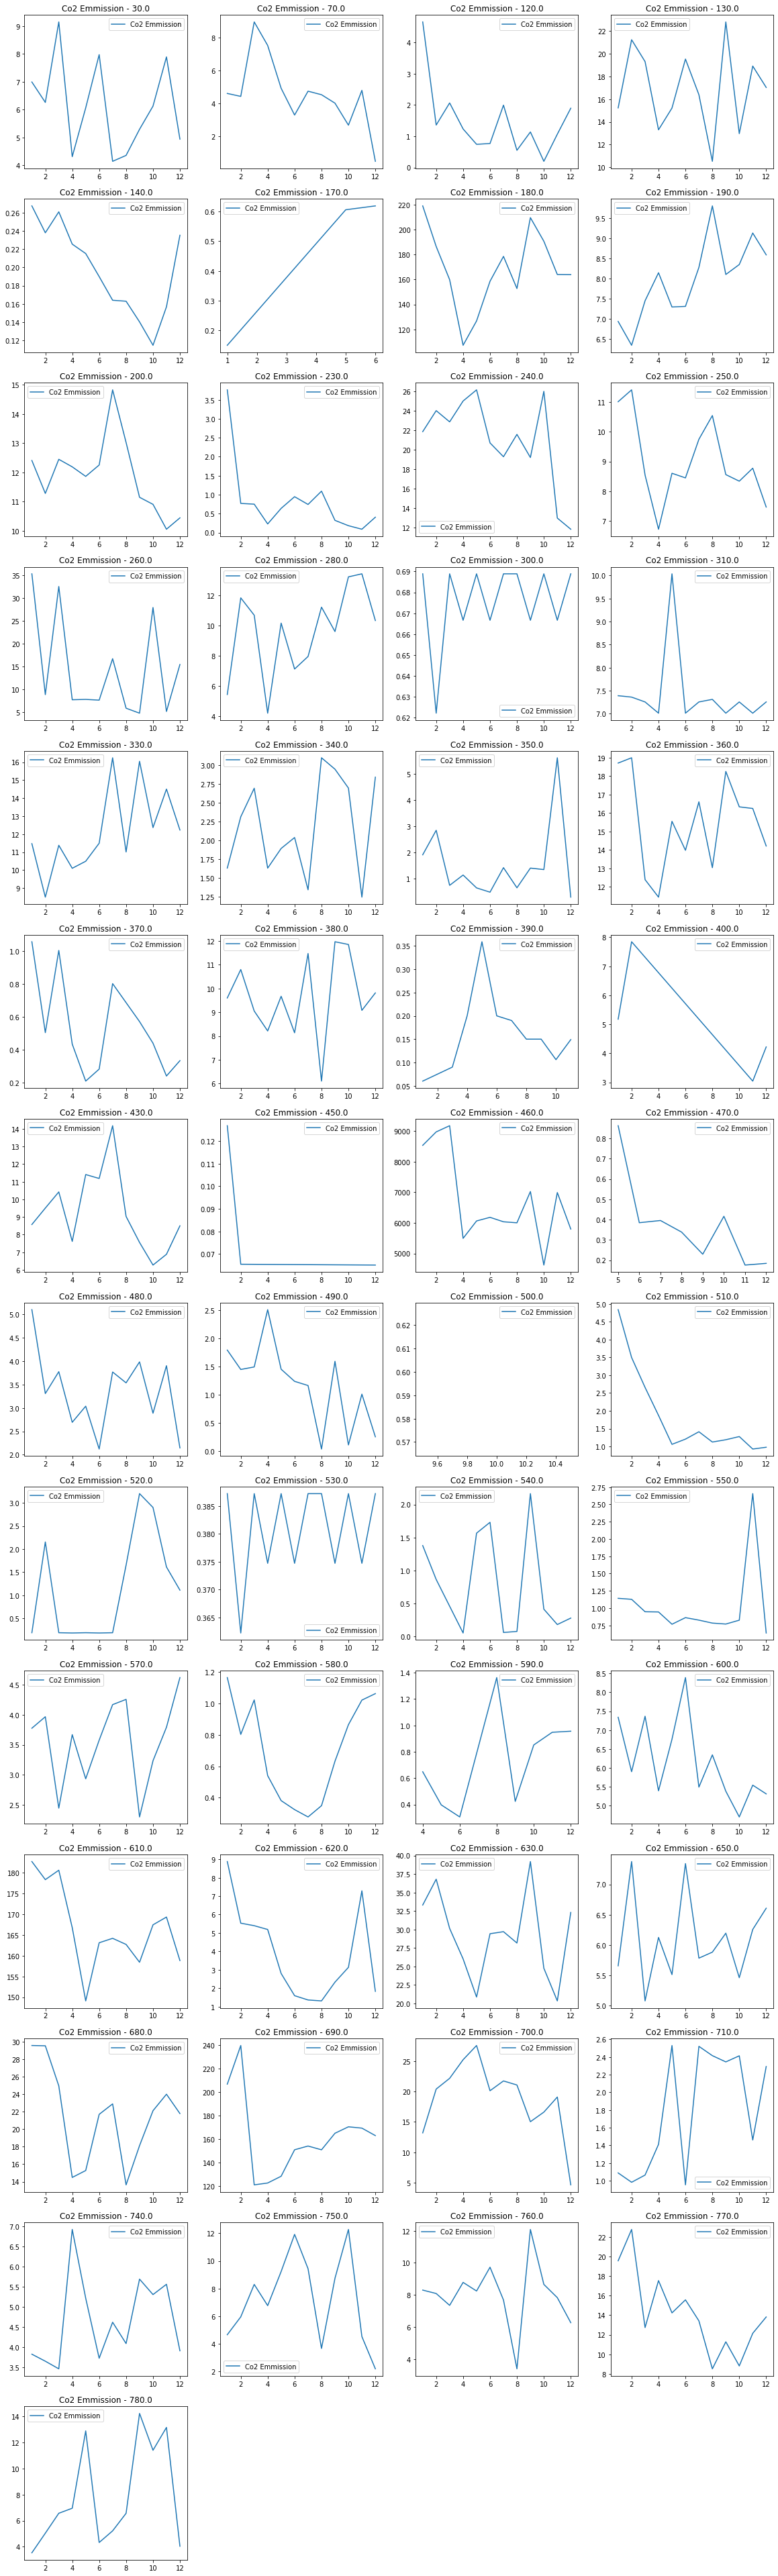

In [18]:
#get the evolution of offset exp through time
import matplotlib.pyplot as plt
plt.figure(figsize=(20,100))

for i,client in zip(range(1,55),clients):
    plt.subplot(20, 4, i)
    plt.plot(new_data_groupby.loc[new_data_groupby['ClientID'] == client]['Month'],
             new_data_groupby.loc[new_data_groupby['ClientID'] == client]['new_value'], label='Co2 Emmission')
    plt.title(f'Co2 Emmission - {client}')
    plt.legend()
    
plt.show()

## Analyzing the target feature

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

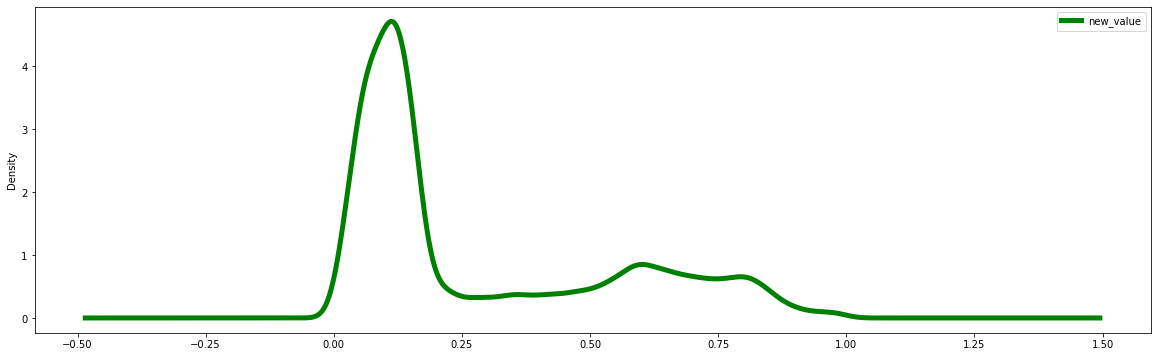

In [20]:
import numpy as np

#normal=(np.random.normal(size = vis.shape[0], scale = 1))
sorted_data_df["new_value"].plot.kde(figsize=(20,6), linewidth = 5, color = "green")
#pd.Series(normal).plot.kde(linewidth = 5, label = "normal", linestyle = "--", color = "k", alpha = 0.2)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


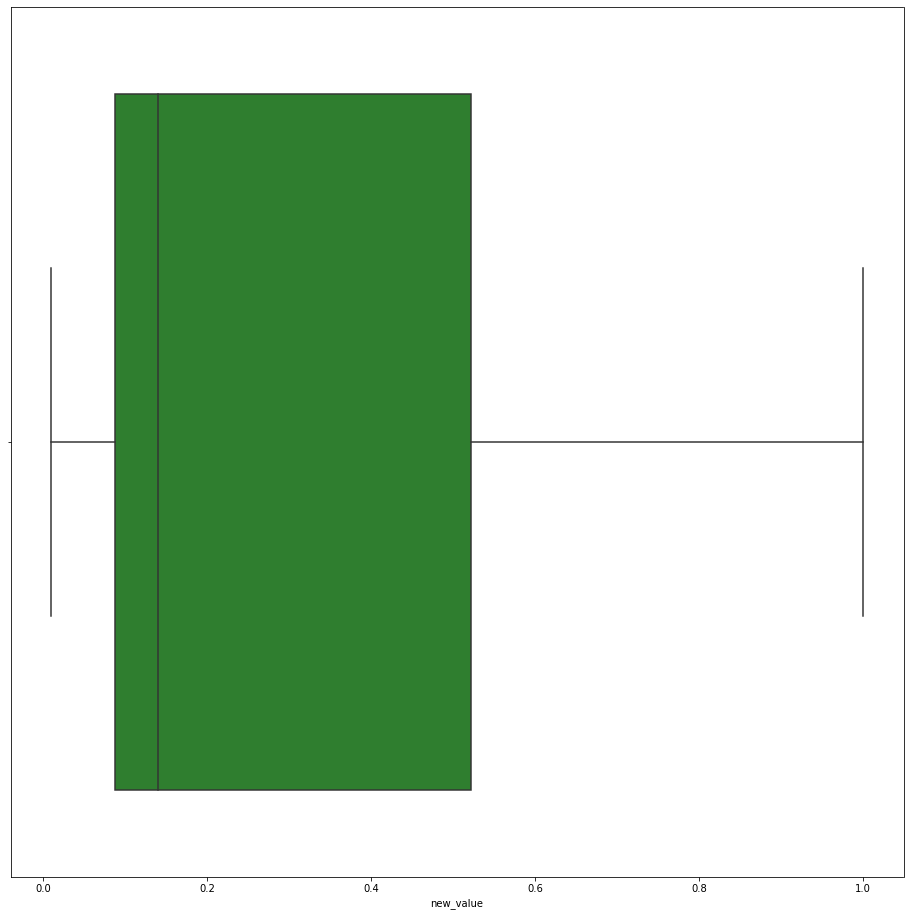

In [21]:
fig, ax = plt.subplots(figsize=(16,16))
ax = sns.boxplot(sorted_data_df["new_value"], color = "forestgreen")

In [22]:
sorted_data_df["new_value"].loc[sorted_data_df["new_value"]<0].count()

0

In [23]:
sorted_data_df.loc[sorted_data_df["new_value"]<0].head()

,Unnamed: 0,Id,ClientID,OrganizationalUnitID,OrganizationalUnitTypeDescription,SourceDescription,Month,Year,PeriodDescription,AspectGroupDescription,FactorDescription,AspectDescription,UnitDescription,GEIDescription,EmitterGEIDescription,VendorName,ScopeDescription,BiogenicEmission,new_value


In [24]:
Negative_emissions = sorted_data_df.loc[sorted_data_df["new_value"]<0]

In [25]:
sorted_data_df.loc[sorted_data_df["new_value"]==0].count()

Unnamed: 0                           0
Id                                   0
ClientID                             0
OrganizationalUnitID                 0
OrganizationalUnitTypeDescription    0
SourceDescription                    0
Month                                0
Year                                 0
PeriodDescription                    0
AspectGroupDescription               0
FactorDescription                    0
AspectDescription                    0
UnitDescription                      0
GEIDescription                       0
EmitterGEIDescription                0
VendorName                           0
ScopeDescription                     0
BiogenicEmission                     0
new_value                            0
dtype: int64

In [26]:
Zero_Emissions = sorted_data_df.loc[sorted_data_df["new_value"]==0]

In [27]:
sorted_data_df =  sorted_data_df.loc[sorted_data_df["new_value"]>0]

In [28]:
quantiles = [0,0.25,0.5,0.75,0.9]
for quantile in quantiles:
    print(sorted_data_df["new_value"].quantile(q=quantile))

print(sorted_data_df["new_value"].max())
print(sorted_data_df["new_value"].min())
print(sorted_data_df["new_value"].mean())

0.010005333
0.0874
0.139560609
0.522
0.728
0.999836066
0.010005333
0.2826964404775288


## Creating new Features from new value

In [29]:
sorted_data_df.groupby(['ClientID','OrganizationalUnitID','Year','Month']).sum().reset_index()

,ClientID,OrganizationalUnitID,Year,Month,Unnamed: 0,Id,OrganizationalUnitTypeDescription,SourceDescription,PeriodDescription,AspectGroupDescription,FactorDescription,AspectDescription,UnitDescription,GEIDescription,EmitterGEIDescription,VendorName,ScopeDescription,BiogenicEmission,new_value
0,30.0,16.0,2020.0,1.0,98762,1032186.0,52.0,11744.0,24.0,32.0,4.0,392.0,36.0,8.0,19.0,444.0,8.0,0.0,0.551201
1,30.0,16.0,2020.0,2.0,49374,516080.0,26.0,5872.0,12.0,16.0,2.0,196.0,18.0,4.0,6.0,222.0,4.0,0.0,1.341952
2,30.0,16.0,2020.0,3.0,24687,258042.0,13.0,2936.0,6.0,8.0,1.0,98.0,9.0,2.0,6.0,111.0,2.0,0.0,0.038975
3,30.0,18.0,2017.0,1.0,13,17144.0,36.0,5848.0,6.0,8.0,5.0,59.0,14.0,4.0,12.0,274.0,3.0,0.0,0.652310
4,30.0,18.0,2017.0,2.0,16,17147.0,36.0,5848.0,6.0,8.0,5.0,59.0,14.0,4.0,12.0,274.0,3.0,0.0,0.589183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7525,780.0,1652.0,2021.0,8.0,847365,2869809.0,36.0,4838.0,14.0,4.0,2.0,40.0,18.0,2.0,12.0,356.0,2.0,0.0,1.848400
7526,780.0,1652.0,2021.0,9.0,7625989,25827985.0,324.0,43542.0,126.0,36.0,18.0,360.0,162.0,18.0,108.0,3204.0,18.0,0.0,5.687040
7527,780.0,1652.0,2021.0,10.0,7620105,25804209.0,324.0,43542.0,126.0,36.0,18.0,360.0,162.0,18.0,108.0,3204.0,18.0,0.0,5.040384
7528,780.0,1652.0,2021.0,11.0,7620177,25804281.0,324.0,43542.0,126.0,36.0,18.0,360.0,162.0,18.0,108.0,3204.0,18.0,0.0,2.940400


In [30]:
new_df = sorted_data_df.groupby(['ClientID','OrganizationalUnitID','Year','Month']).agg({'new_value':['sum','mean']}).reset_index()[['ClientID','OrganizationalUnitID','Year','Month','new_value']]

In [31]:
new_df.columns = ['ClientID','OrganizationalUnitID','Year','Month','overall_sum','overall_mean']

In [32]:
new_df.columns

Index(['ClientID', 'OrganizationalUnitID', 'Year', 'Month', 'overall_sum',
       'overall_mean'],
      dtype='object')

In [33]:
new_df.head()

,ClientID,OrganizationalUnitID,Year,Month,overall_sum,overall_mean
0,30.0,16.0,2020.0,1.0,0.551201,0.137800
1,30.0,16.0,2020.0,2.0,1.341952,0.670976
2,30.0,16.0,2020.0,3.0,0.038975,0.038975
3,30.0,18.0,2017.0,1.0,0.652310,0.326155
4,30.0,18.0,2017.0,2.0,0.589183,0.294591


In [34]:
new_df['sum_lag_1'] = new_df['overall_sum'].shift(1).fillna(0)
new_df['sum_lag_2'] = new_df['overall_sum'].shift(2).fillna(0)
new_df['sum_lag_4'] = new_df['overall_sum'].shift(4).fillna(0)
new_df['sum_lag_6'] = new_df['overall_sum'].shift(6).fillna(0)

new_df['mean_lag_1'] = new_df['overall_mean'].shift(1).fillna(0)
new_df['mean_lag_2'] = new_df['overall_mean'].shift(2).fillna(0)
new_df['mean_lag_4'] = new_df['overall_mean'].shift(4).fillna(0)
new_df['mean_lag_6'] = new_df['overall_mean'].shift(6).fillna(0)

In [35]:
new_df.head()

,ClientID,OrganizationalUnitID,Year,Month,overall_sum,overall_mean,sum_lag_1,sum_lag_2,sum_lag_4,sum_lag_6,mean_lag_1,mean_lag_2,mean_lag_4,mean_lag_6
0,30.0,16.0,2020.0,1.0,0.551201,0.137800,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.0
1,30.0,16.0,2020.0,2.0,1.341952,0.670976,0.551201,0.000000,0.000000,0.0,0.137800,0.000000,0.0000,0.0
2,30.0,16.0,2020.0,3.0,0.038975,0.038975,1.341952,0.551201,0.000000,0.0,0.670976,0.137800,0.0000,0.0
3,30.0,18.0,2017.0,1.0,0.652310,0.326155,0.038975,1.341952,0.000000,0.0,0.038975,0.670976,0.0000,0.0
4,30.0,18.0,2017.0,2.0,0.589183,0.294591,0.652310,0.038975,0.551201,0.0,0.326155,0.038975,0.1378,0.0


In [36]:
new_data = pd.merge(sorted_data_df, new_df, on=['ClientID','OrganizationalUnitID','Year','Month'])

In [37]:
new_data.head()

,Unnamed: 0,Id,ClientID,OrganizationalUnitID,OrganizationalUnitTypeDescription,SourceDescription,Month,Year,PeriodDescription,AspectGroupDescription,...,overall_sum,overall_mean,sum_lag_1,sum_lag_2,sum_lag_4,sum_lag_6,mean_lag_1,mean_lag_2,mean_lag_4,mean_lag_6
0,24685,258036.0,30.0,16.0,13,2936,1.0,2020.0,6,8,...,0.551201,0.137800,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
1,24689,258044.0,30.0,16.0,13,2936,1.0,2020.0,6,8,...,0.551201,0.137800,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
2,24693,258050.0,30.0,16.0,13,2936,1.0,2020.0,6,8,...,0.551201,0.137800,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
3,24695,258056.0,30.0,16.0,13,2936,1.0,2020.0,6,8,...,0.551201,0.137800,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
4,24683,258032.0,30.0,16.0,13,2936,2.0,2020.0,6,8,...,1.341952,0.670976,0.551201,0.0,0.0,0.0,0.1378,0.0,0.0,0.0


In [38]:
new_data.sample(5)

,Unnamed: 0,Id,ClientID,OrganizationalUnitID,OrganizationalUnitTypeDescription,SourceDescription,Month,Year,PeriodDescription,AspectGroupDescription,...,overall_sum,overall_mean,sum_lag_1,sum_lag_2,sum_lag_4,sum_lag_6,mean_lag_1,mean_lag_2,mean_lag_4,mean_lag_6
302519,512574,1752199.0,690.0,1534.0,9,2558,1.0,2022.0,8,5,...,9.793336,0.057271,17.873598,20.737483,15.990022,13.460341,0.076711,0.082619,0.073687,0.069027
227668,64185,436970.0,460.0,414.0,5,7,12.0,2020.0,6,1,...,789.586299,0.320970,801.418967,787.728900,713.186481,660.178545,0.333925,0.328357,0.318956,0.318465
46456,132085,540503.0,460.0,409.0,5,463,2.0,2020.0,6,1,...,615.587875,0.329544,488.364030,242.145097,0.896321,562.477301,0.320029,0.299685,0.128046,0.316176
137904,328610,1311116.0,460.0,411.0,5,739,3.0,2021.0,7,1,...,212.055481,0.303804,191.152659,178.553783,208.239245,207.506072,0.320189,0.313252,0.338051,0.337958
36751,43786,398690.0,460.0,409.0,5,164,8.0,2019.0,5,1,...,562.477301,0.316176,216.591199,245.388966,544.698412,523.398052,0.279112,0.258304,0.315584,0.313037


In [39]:
new_data.columns

Index(['Unnamed: 0', 'Id', 'ClientID', 'OrganizationalUnitID',
       'OrganizationalUnitTypeDescription', 'SourceDescription', 'Month',
       'Year', 'PeriodDescription', 'AspectGroupDescription',
       'FactorDescription', 'AspectDescription', 'UnitDescription',
       'GEIDescription', 'EmitterGEIDescription', 'VendorName',
       'ScopeDescription', 'BiogenicEmission', 'new_value', 'overall_sum',
       'overall_mean', 'sum_lag_1', 'sum_lag_2', 'sum_lag_4', 'sum_lag_6',
       'mean_lag_1', 'mean_lag_2', 'mean_lag_4', 'mean_lag_6'],
      dtype='object')

In [40]:
new_data.reset_index(drop=True,inplace=True)

In [41]:
new_data.head()

,Unnamed: 0,Id,ClientID,OrganizationalUnitID,OrganizationalUnitTypeDescription,SourceDescription,Month,Year,PeriodDescription,AspectGroupDescription,...,overall_sum,overall_mean,sum_lag_1,sum_lag_2,sum_lag_4,sum_lag_6,mean_lag_1,mean_lag_2,mean_lag_4,mean_lag_6
0,24685,258036.0,30.0,16.0,13,2936,1.0,2020.0,6,8,...,0.551201,0.137800,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
1,24689,258044.0,30.0,16.0,13,2936,1.0,2020.0,6,8,...,0.551201,0.137800,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
2,24693,258050.0,30.0,16.0,13,2936,1.0,2020.0,6,8,...,0.551201,0.137800,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
3,24695,258056.0,30.0,16.0,13,2936,1.0,2020.0,6,8,...,0.551201,0.137800,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
4,24683,258032.0,30.0,16.0,13,2936,2.0,2020.0,6,8,...,1.341952,0.670976,0.551201,0.0,0.0,0.0,0.1378,0.0,0.0,0.0


In [43]:
#divide to train and test
train = new_data.iloc[0:100_000,]
test = new_data.loc[250_000:,]

#create 'X_train', 'y_train', 'X_test', and 'y_test'
X_train = train.drop(["new_value","Unnamed: 0","Id",'overall_sum','overall_mean', "ClientID", "OrganizationalUnitID"], axis="columns")
y_train = train['new_value']

X_test = test.drop(["new_value","Unnamed: 0","Id",'overall_sum','overall_mean', "ClientID", "OrganizationalUnitID"], axis="columns")
y_test = test['new_value']

In [44]:
X_train.columns

Index(['OrganizationalUnitTypeDescription', 'SourceDescription', 'Month',
       'Year', 'PeriodDescription', 'AspectGroupDescription',
       'FactorDescription', 'AspectDescription', 'UnitDescription',
       'GEIDescription', 'EmitterGEIDescription', 'VendorName',
       'ScopeDescription', 'BiogenicEmission', 'sum_lag_1', 'sum_lag_2',
       'sum_lag_4', 'sum_lag_6', 'mean_lag_1', 'mean_lag_2', 'mean_lag_4',
       'mean_lag_6'],
      dtype='object')

In [45]:
from sklearn.model_selection import TimeSeriesSplit

ts_cv = TimeSeriesSplit(
    n_splits=5,
    max_train_size=220_000,
    test_size=40_000,
)

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [47]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [48]:
import pickle
pickle.dump(rf, open('drive/MyDrive/Capstone/model2.pkl', 'wb'))

In [69]:
# Use the forest's predict method on the test data
import numpy as np

In [70]:
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.12


In [71]:
confront = pd.DataFrame(predictions,y_test)
confront = confront.reset_index().rename(columns={0: "Predictions", "new_value": "test_values"})

In [72]:
confront.head()

,test_values,Predictions
0,0.094121,0.077512
1,0.038884,0.118521
2,0.205000,0.628115
3,0.205000,0.636182
4,0.039545,0.120548


In [73]:
confront["Errors"] = abs(confront["Predictions"]-confront["test_values"])
confront["%Error"] = round((confront["Errors"]/confront["test_values"])*100,1)
confront.head()

,test_values,Predictions,Errors,%Error
0,0.094121,0.077512,0.016609,17.6
1,0.038884,0.118521,0.079637,204.8
2,0.205000,0.628115,0.423115,206.4
3,0.205000,0.636182,0.431182,210.3
4,0.039545,0.120548,0.081003,204.8


In [74]:
confront.describe()

,test_values,Predictions,Errors,%Error
count,70343.000000,70343.000000,7.034300e+04,70343.000000
mean,0.203779,0.245276,1.216633e-01,171.684118
std,0.230627,0.170396,1.276999e-01,329.087427
min,0.010006,0.023157,6.842857e-07,0.000000
25%,0.057986,0.108957,2.666514e-02,18.000000
50%,0.098000,0.176762,7.687641e-02,48.200000
75%,0.248043,0.353101,1.764202e-01,180.800000
max,0.999836,0.907092,9.357149e-01,6917.800000


In [75]:
pd.DataFrame(confront.loc[confront["test_values"]<confront["test_values"].quantile(q=0.05)].mean())

,0
test_values,0.016488
Predictions,0.157880
Errors,0.141392
%Error,922.698491


In [76]:
pd.DataFrame(confront.loc[confront["test_values"]>confront["test_values"].quantile(q=0.1)].mean())

,0
test_values,0.223895
Predictions,0.254436
Errors,0.119616
%Error,112.906022


In [77]:
pd.DataFrame(confront.loc[confront["test_values"]>confront["test_values"].quantile(q=0.99)].mean())

,0
test_values,0.944311
Predictions,0.440874
Errors,0.503437
%Error,53.139631


In [78]:
pd.DataFrame(confront.loc[(confront["test_values"]>confront["test_values"].quantile(q=0.25))&(confront["test_values"]<confront["test_values"].quantile(q=0.75))].mean())

,0
test_values,0.108125
Predictions,0.184367
Errors,0.088904
%Error,99.964342


In [ ]:
from sklearn.model_selection import GridSearchCV

estimators = range(300, 601, 100)
depths = range(6,9,1)
features = range(4,8,2)
leaves = range(7,10,2)

In [ ]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': depths,
    'max_features': features,
    'min_samples_leaf': leaves,
    'n_estimators': estimators,
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'neg_root_mean_squared_error', 
                          cv = ts_cv, n_jobs = -1,)
#grid_search.fit(X_train,y_train)

In [ ]:
results = pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score", ascending = True)
results.to_csv("First_grid_forest.csv")

In [ ]:
results["param_max_depth"].head()

44    8
45    8
41    8
43    8
40    8
Name: param_max_depth, dtype: object

In [ ]:
results["param_max_features"].head()

44    6
45    6
41    6
43    6
40    6
Name: param_max_features, dtype: object

In [ ]:
results["param_min_samples_leaf"].head()

44    9
45    9
41    7
43    7
40    7
Name: param_min_samples_leaf, dtype: object

In [ ]:
results["param_n_estimators"].head()

44    300
45    400
41    400
43    600
40    300
Name: param_n_estimators, dtype: object

In [ ]:
results.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
44,46.254351,21.109409,0.744231,0.024758,8,6,9,300,"{'max_depth': 8, 'max_features': 6, 'min_sampl...",-0.208273,-0.216954,-0.215558,-0.214471,-0.21109,-0.213269,0.003162,1


In [ ]:
results = pd.read_csv("First_grid_forest.csv")

In [ ]:
results_forest  = results.loc[(slice(None)),["param_max_depth","param_max_features","param_min_samples_leaf","param_n_estimators","mean_test_score","std_test_score"]].rename(
    columns={ "param_max_depth" : "max_depth","param_n_estimators":"n_trees", "param_max_features":"max_features","param_min_samples_leaf":"samples_per_leaf"})

In [ ]:
results_forest.head(1)

,max_depth,max_features,samples_per_leaf,n_trees,mean_test_score,std_test_score
0,8,6,9,300,-0.213269,0.003162


<AxesSubplot:xlabel='max_depth', ylabel='mean_test_score'>

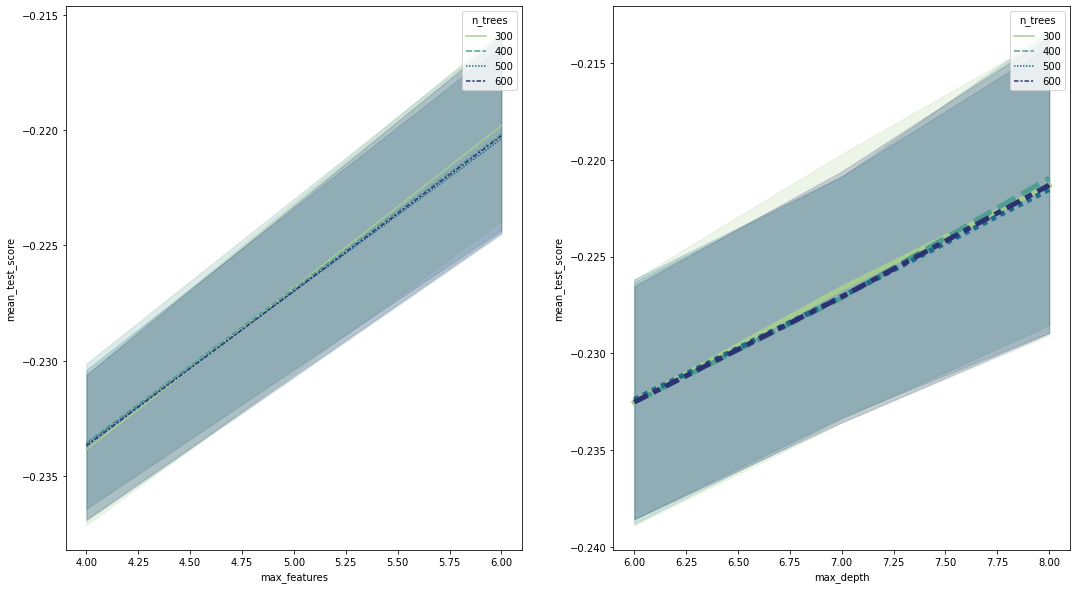

In [ ]:
#dark = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
green = sns.color_palette("crest", as_cmap=True)
fig, axes = plt.subplots(figsize = (18,10), ncols=2)
sns.lineplot(
    data = results_forest, x = "max_features", y = "mean_test_score", ax=axes[0], palette = green, hue = "n_trees", style = "n_trees")
sns.lineplot(
    data = results_forest, hue = "n_trees", y ="mean_test_score", x = "max_depth", ax=axes[1], palette = green, style= "n_trees", linewidth = 5)

<AxesSubplot:xlabel='max_depth', ylabel='mean_test_score'>

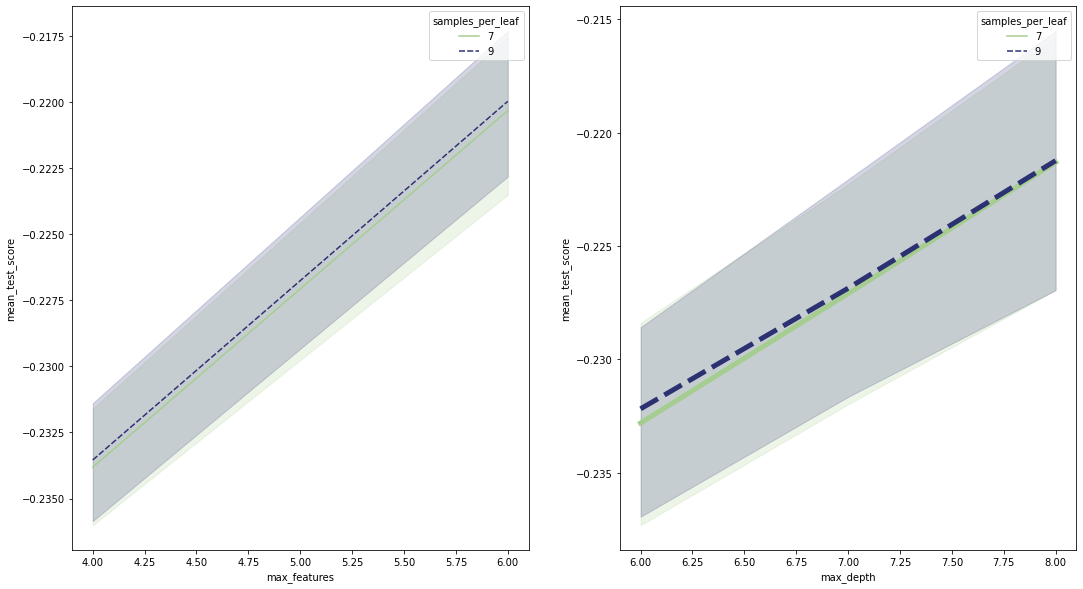

In [ ]:
fig, axes = plt.subplots(figsize = (18,10), ncols=2)
sns.lineplot(
    data = results_forest, x = "max_features", y = "mean_test_score", ax=axes[0], palette = green, hue = "samples_per_leaf", style = "samples_per_leaf")
sns.lineplot(
    data = results_forest, hue = "samples_per_leaf", y ="mean_test_score", x = "max_depth", ax=axes[1], palette = green, style= "samples_per_leaf", linewidth = 5)

In [ ]:
depths = range(10,51,10)
features = range(8,21,4)


In [ ]:
param_grid = {
    'max_depth': depths,
    'max_features': features,
    
    
}
rf = RandomForestRegressor(min_samples_leaf = 9, n_estimators = 300)

In [ ]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'neg_root_mean_squared_error', 
                          cv = ts_cv, n_jobs = -1,)

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=220000, n_splits=5, test_size=40000),
             estimator=RandomForestRegressor(min_samples_leaf=9,
                                             n_estimators=300),
             n_jobs=-1,
             param_grid={'max_depth': range(10, 51, 10),
                         'max_features': range(8, 21, 4)},
             scoring='neg_root_mean_squared_error')

In [ ]:
results2 = pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score", ascending = True)

In [ ]:
results2.to_csv("2nd_grid_forest.csv")

In [ ]:
results2.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,192.544314,90.051264,0.953918,0.023844,10,20,"{'max_depth': 10, 'max_features': 20}",-0.160596,-0.168568,-0.160005,-0.16169,-0.170201,-0.164212,0.004289,1


In [ ]:
results2 = pd.read_csv("2nd_grid_forest.csv")

In [ ]:
results_forest2  = results2.loc[(slice(None)),["param_max_depth","param_max_features","mean_test_score","std_test_score"]].rename(
    columns={ "param_max_depth" : "max_depth", "param_max_features":"max_features"})

In [ ]:
results_forest2.head(1)

,max_depth,max_features,mean_test_score,std_test_score
0,10,20,-0.164212,0.004289


<AxesSubplot:xlabel='max_depth', ylabel='mean_test_score'>

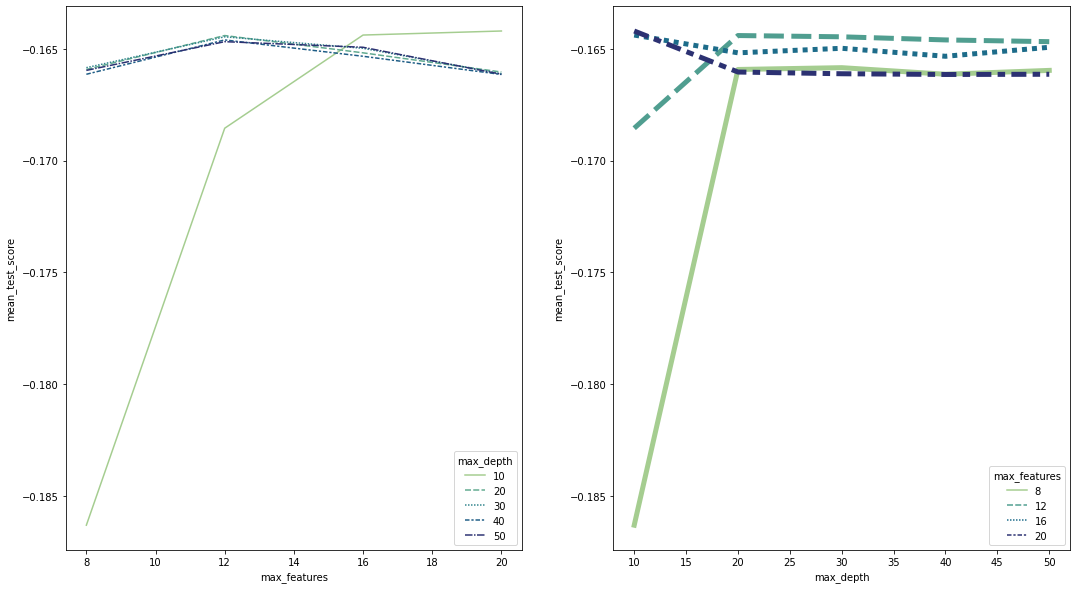

In [ ]:
#dark = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
green = sns.color_palette("crest", as_cmap=True)

fig, axes = plt.subplots(figsize = (18,10), ncols=2)
sns.lineplot(
    data = results_forest2, x = "max_features", y = "mean_test_score", ax=axes[0], palette = green, hue = "max_depth", style = "max_depth")
sns.lineplot(
    data = results_forest2, hue = "max_features", y ="mean_test_score", x = "max_depth", ax=axes[1], palette = green, style= "max_features", linewidth = 5)

In [ ]:
depths = range(7,11,1)
param_grid = {
    'max_depth': depths,  
}
rf = RandomForestRegressor(min_samples_leaf = 9, n_estimators = 300, max_features=20)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'neg_root_mean_squared_error', 
                          cv = ts_cv, n_jobs = -1,)

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=220000, n_splits=5, test_size=40000),
             estimator=RandomForestRegressor(max_features=20,
                                             min_samples_leaf=9,
                                             n_estimators=300),
             n_jobs=-1, param_grid={'max_depth': range(7, 11)},
             scoring='neg_root_mean_squared_error')

In [ ]:
results3 = pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score", ascending = True)

In [ ]:
results3.to_csv("3rd_grid_forest.csv")

In [ ]:
results3 = pd.read_csv("3rd_grid_forest.csv")

In [ ]:
results3.head(1)

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2,139.273079,56.039922,0.668018,0.132549,9,{'max_depth': 9},-0.161186,-0.168612,-0.159945,-0.161638,-0.170803,-0.164437,0.004394,1


In [ ]:
results_forest3  = results3.loc[(slice(None)),["param_max_depth","mean_test_score","std_test_score"]].rename(
    columns={ "param_max_depth" : "max_depth"})

<AxesSubplot:xlabel='max_depth', ylabel='mean_test_score'>

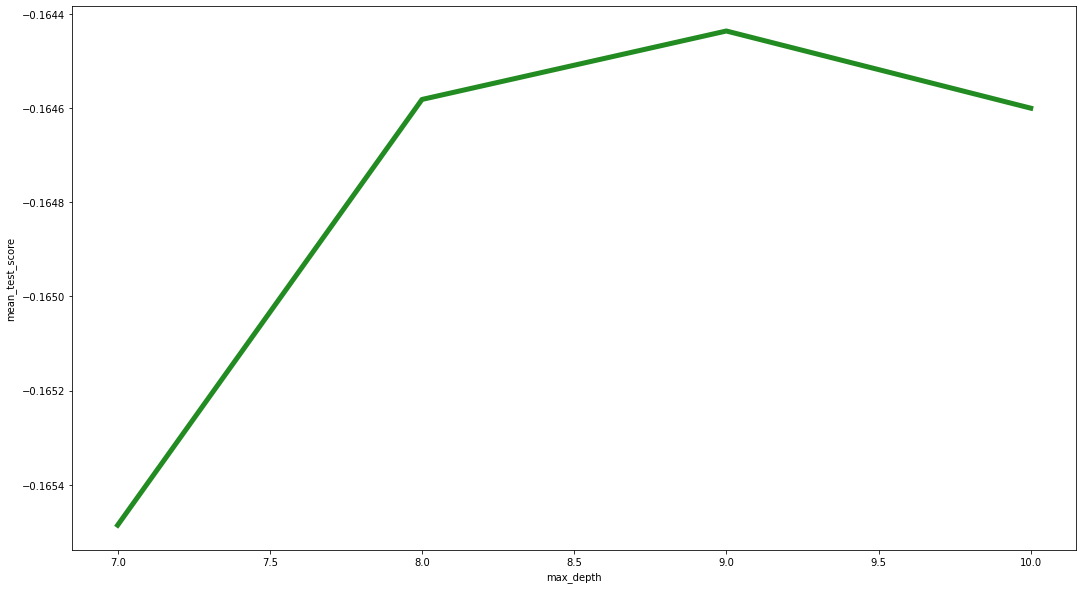

In [ ]:
dark = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

fig, axes = plt.subplots(figsize = (18,10))
sns.lineplot(
    data = results_forest3, x = "max_depth", y = "mean_test_score", ax=axes, color = "forestgreen", linewidth = 5)


In [ ]:
rf = RandomForestRegressor(min_samples_leaf = 9, n_estimators = 300, max_features=20, max_depth= 9)

In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=9, max_features=20, min_samples_leaf=9,
                      n_estimators=300)

In [ ]:
# Use the forest's predict method on the test data
import numpy as np
predictions2 = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions2 - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.08


In [ ]:
confront2 = pd.DataFrame(predictions2,y_test)
confront2 = confront2.reset_index().rename(columns={0: "Predictions", "new_value": "test_values"})

In [ ]:
confront2["Errors"] = abs(confront2["Predictions"]-confront2["test_values"])
confront2["%Error"] = round((confront2["Errors"]/confront2["test_values"])*100,1)
confront2.describe()

,test_values,Predictions,Errors,%Error
count,70343.000000,70343.000000,7.034300e+04,70343.000000
mean,0.203779,0.210201,8.213642e-02,96.067546
std,0.230627,0.179049,1.118077e-01,236.129048
min,0.010006,0.034056,2.223709e-07,0.000000
25%,0.057986,0.086437,1.548458e-02,13.100000
50%,0.098000,0.140515,3.874878e-02,30.000000
75%,0.248043,0.249916,9.611384e-02,75.000000
max,0.999836,0.849257,9.091649e-01,5540.900000


In [ ]:
confront.describe()

,test_values,Predictions,Errors,%Error
count,70343.000000,70343.000000,7.034300e+04,70343.000000
mean,0.203779,0.212214,8.707501e-02,105.396887
std,0.230627,0.179888,1.135326e-01,257.526225
min,0.010006,0.011626,1.516353e-07,0.000000
25%,0.057986,0.083247,1.445212e-02,12.600000
50%,0.098000,0.129927,3.999689e-02,29.700000
75%,0.248043,0.302469,1.183352e-01,79.800000
max,0.999836,0.986246,9.071201e-01,6325.900000


In [ ]:
pd.DataFrame(confront2.loc[confront2["test_values"]>confront2["test_values"].quantile(q=0.1)].mean())

,0
test_values,0.223895
Predictions,0.221664
Errors,0.081898
%Error,57.969794


In [ ]:
pd.DataFrame(confront2.loc[(confront2["test_values"]>confront2["test_values"].quantile(q=0.25))&(confront2["test_values"]<confront2["test_values"].quantile(q=0.75))].mean())

,0
test_values,0.108125
Predictions,0.141684
Errors,0.046098
%Error,48.072652


In [ ]:
top_10_feat_importance = pd.DataFrame(rf.feature_importances_, index=X_train.columns.tolist(), 
             columns=['Importance']).sort_values('Importance', ascending=False).head(5)
top_10_feat_importance

,Importance
GEIDescription,0.833097
overall_mean_y,0.046246
EmitterGEIDescription,0.037560
AspectDescription,0.035983
SourceDescription,0.026360


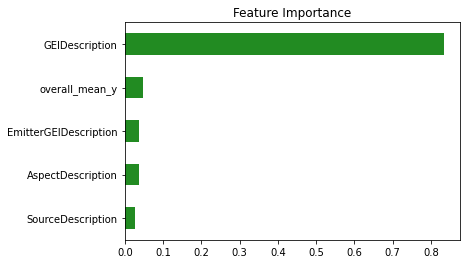

In [ ]:
top_10_feat_importance.sort_values(by='Importance', ascending=True).plot.barh(color='forestgreen')
plt.title('Feature Importance')
plt.legend().remove()